Install Library and get the image

In [1]:
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np 

img = cv2.cvtColor(cv2.imread("Anime/superDetailHDImage.jpg"), cv2.COLOR_BGR2RGB)
print(img.shape)


(3300, 5391, 3)


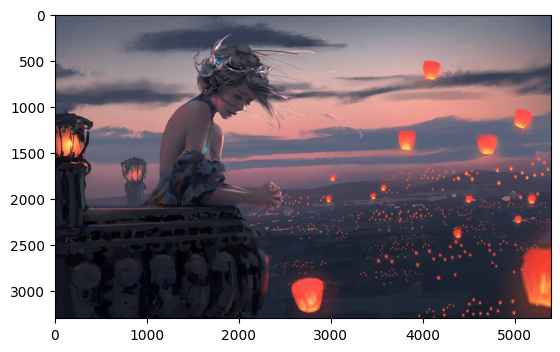

In [2]:


plt.imshow(img)
# r, g, b = cv2.split(img)
# r, g, b = r /255, g/255, b/255


In [3]:
# compress - reconstruct (See how much we loss) 
r, g, b = cv2.split(img)
r, g, b = r / 255, g / 255, b / 255

In [4]:
# reduce the number of components
pca_components = 90;


pca_r = PCA(n_components=pca_components)
reduced_r = pca_r.fit_transform(r)

pca_g = PCA(n_components=pca_components)
reducted_g = pca_g.fit_transform(g)

pca_b = PCA(n_components=pca_components)
reducted_b = pca_b.fit_transform(b)

In [5]:
combined = np.array([reduced_r, reducted_g, reducted_b])
reconstructed_r = pca_r.inverse_transform(reduced_r)
reconstructed_g = pca_g.inverse_transform(reducted_g)
reconstructed_b = pca_b.inverse_transform(reducted_b)


In [6]:
img_reconstructed = (cv2.merge((reconstructed_r, reconstructed_g, reconstructed_b)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


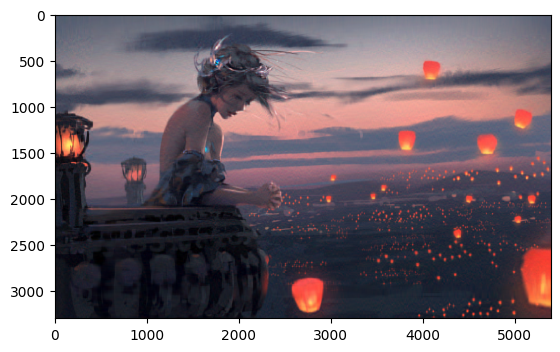

In [7]:
plt.imshow(img_reconstructed)

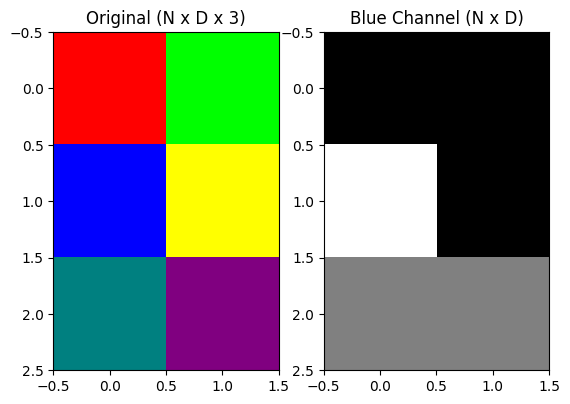

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Create a sample color image (3 x 2 x 3)
image = np.array([[[255, 0, 0], [0, 255, 0]],   # Red and Green rows
                  [[0, 0, 255], [255, 255, 0]], # Blue and Yellow rows
                  [[0, 128, 128], [128, 0, 128]]]) # Teal and Purple rows

# Transpose the image
transposed_image = np.transpose(image, (2, 0, 1))

# Display the original and transposed images
fig, axes = plt.subplots(1, 2)

# Original Image
axes[0].imshow(image)
axes[0].set_title("Original (N x D x 3)")

# Transposed Image
for i, channel_name in enumerate(['Red', 'Green', 'Blue']):
    axes[1].imshow(transposed_image[i], cmap='gray')  # Display each channel as grayscale
    axes[1].set_title(f"{channel_name} Channel (N x D)")

plt.show()